In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt

from numpy import arange
from scipy.integrate import odeint
from scipy import optimize
from scipy import misc

In [2]:
# parameters
m = 100                                #GeV Singlet Mass
Mp = 1.22e19                            #GeV Planck Mass

## Here just playng with the particle number density, nothing importat

In [172]:
x=np.linspace(2,4,100)
s=np.sin(x)
z=special.zeta(x)

In [173]:
x

array([2.        , 2.02020202, 2.04040404, 2.06060606, 2.08080808,
       2.1010101 , 2.12121212, 2.14141414, 2.16161616, 2.18181818,
       2.2020202 , 2.22222222, 2.24242424, 2.26262626, 2.28282828,
       2.3030303 , 2.32323232, 2.34343434, 2.36363636, 2.38383838,
       2.4040404 , 2.42424242, 2.44444444, 2.46464646, 2.48484848,
       2.50505051, 2.52525253, 2.54545455, 2.56565657, 2.58585859,
       2.60606061, 2.62626263, 2.64646465, 2.66666667, 2.68686869,
       2.70707071, 2.72727273, 2.74747475, 2.76767677, 2.78787879,
       2.80808081, 2.82828283, 2.84848485, 2.86868687, 2.88888889,
       2.90909091, 2.92929293, 2.94949495, 2.96969697, 2.98989899,
       3.01010101, 3.03030303, 3.05050505, 3.07070707, 3.09090909,
       3.11111111, 3.13131313, 3.15151515, 3.17171717, 3.19191919,
       3.21212121, 3.23232323, 3.25252525, 3.27272727, 3.29292929,
       3.31313131, 3.33333333, 3.35353535, 3.37373737, 3.39393939,
       3.41414141, 3.43434343, 3.45454545, 3.47474747, 3.49494

In [174]:
T= np.linspace(400000,3200,200000)
m=30

In [175]:
def n_no_g(m,T):
    return ((m*T/(2*np.pi))**(3/2))* np.exp(-(m/T))

#this is the number density of particles in a non relativistic limit without the g factor of the d.o.f.

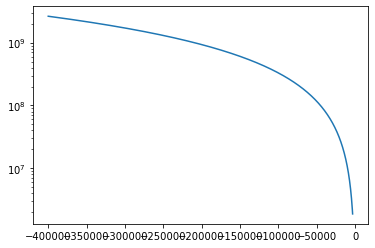

In [176]:
plt.plot(-T,n_no_g(m,T))
plt.yscale('log')

In [ ]:
# okay it follow sthe right behaviour of the equilibrium of particles.

#But also the massive particles had theyr period in which they obey at the radiation behaviour no?
#And then starts to be a non radiative one (as the one just plotted), do we have to consider it?

#TOMORROW TRY TO TAKE THE SECOND PART AND SEE IF YOU MANAGE TO REPRODUCE THE FREEZE-OUT MECHANISM.

## Trying to parametrize the relativistic degree of freedom

In [75]:
import pandas as pd

In [92]:
dfg=pd.DataFrame([
    {'T':0.05 *1E-3,'geff_to_half': np.sqrt(3.38)},     #I have insert this from the presentation
    {'T':1E-3,'geff_to_half':np.sqrt(10.75)},
    {'T':80*1E-3,'geff_to_half':np.sqrt(17.25)},
    {'T':250*1E-3,'geff_to_half':np.sqrt(61.75)},
    {'T':800*1E-3,'geff_to_half':np.sqrt(75.75)},
    {'T':1,'geff_to_half':8.7},       # I leave it
    {'T':10,'geff_to_half':np.sqrt(86.25)},
    {'T':50,'geff_to_half':np.sqrt(96.25)},
    {'T':100,'geff_to_half':10.2}      #I leave it too
    ])
#geff stands for g efficace

In [93]:
dfg

,T,geff_to_half
0,0.00005,1.838478
1,0.00100,3.278719
2,0.08000,4.153312
3,0.25000,7.858117
4,0.80000,8.703448
5,1.00000,8.700000
6,10.00000,9.287088
7,50.00000,9.810708
8,100.00000,10.200000


In [96]:
dfg['T']

0      0.00005
1      0.00100
2      0.08000
3      0.25000
4      0.80000
5      1.00000
6     10.00000
7     50.00000
8    100.00000
Name: T, dtype: float64

In [97]:
from scipy import optimize

In [157]:
#f=lambda T,a,b,c: a/(1+np.exp(-b*(T-c)))  ********(swith it off for a moment)

def f(T,a,b,c,d,e,f): 
    return a/(1+np.exp(-b*(T-c)))+d+e+(f*T**2)

#function that define the phase space....NO
#what is it???
#******

In [158]:
B,σ=optimize.curve_fit(f,dfg['T'],dfg['geff_to_half'],p0=(0,0,0,0,0,0))  #***(added a 0)

# Use non-linear least squares to fit a function, f, to data.

# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True,
# bounds=(- inf, inf), method=None, jac=None, *, full_output=False, **kwargs)

#p gives initial guess for the parameters

#what is it done for?

In [159]:
B  # OH, SO B HAS INSIDE THE VALUES OF THE PARAMETERS OF THE PHASE SPACE a,b,c RIGHT?
    #YOU GET THEM BY FITTING SOME DATA REFERRING TO A PLOT OF g_eff

array([ 7.89548643e+00,  1.30777606e+01,  1.15376901e-01,  5.42990436e+02,
       -5.41874920e+02,  1.30965399e-04])

In [160]:
gs_to_half= lambda T: f(T,a=B[0],b=B[1],c=B[2],d=B[3],e=B[4],f=B[5])   #********(added d=B[3],e=B[4],f=B[5])


#this is a function just to call the "function". 
                                        #Yess because now I know all the parameters
                            #NOW HERE WE BUILD THE RIGHT PHASE SPACE FUNCTION....no

Text(0.5, 1.0, 'parametrization of the $g_*^{-1/2}$')

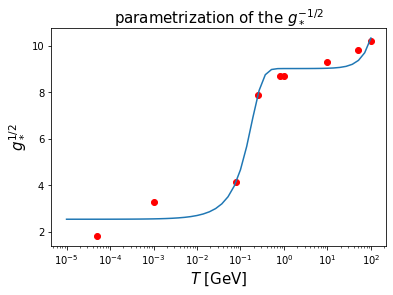

In [161]:
T=np.logspace(np.log10(1E-5),np.log10(100))
plt.semilogx(dfg['T'],dfg['geff_to_half'],'ro') #semilogx Make a plot with log scaling on the x axis.
plt.plot(T,gs_to_half(T) )   #BUT THAT WASN'T THE PHASE SPACE FUNCTION? SO THIS PLOT ISN'T REFERRING TO THAT? NO, IS G STAR SQUARED BUT HOW?!
plt.xlabel('$T$ [GeV]',size=15)
plt.ylabel(r'$g_*^{1/2}$',size=15)

plt.title('parametrization of the $g_*^{-1/2}$', size= 15)

#what was that plot for? looking to the behaviour of g_*?



#So far was clear, but I didn't understand where does the formula of the g_star comes from.********
#that plot was to verify that the function we've biult respect the data we have.


$$\frac{dY}{dx}=- \Bigl(\frac{45}{\pi M_P^2}\Bigr)^{-1/2} \frac{g_*^{1/2}m}{x^2} <\sigma v>(Y^2-Y_{eq}^2)$$


$$ Y_{eq}(x)= \frac{45}{2 \pi^4} \frac{g}{g_{*s}}x^{3/2}e^{-x}= 0.145 \frac{g}{g_{*s}}x^{3/2}e^{-x} $$

$$ g_*(T)= \sum_{boson} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 + \frac{7}{8}\sum_{fermions} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 $$

$$ g_{*s}(T)= \sum_{boson} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 + \frac{7}{8}\sum_{fermions} g_i \Bigl( \frac{T_i}{T} \Bigr)^4 $$

## Under here is with the use of the function gs_to_half

In [162]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
#So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
#the starting point, and the third is the variable you want to integrate into.
#************

In [163]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)  #built followig the formula of the Y effecace/affective

In [164]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  #starting to build the dY/dx

def BEx(x,m=100):
    T=m/x
    return k*gs_to_half(T)/x**2   #missing piece of the formula that's still missing.

In [165]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx (7.10 formula of DM production mechanism)

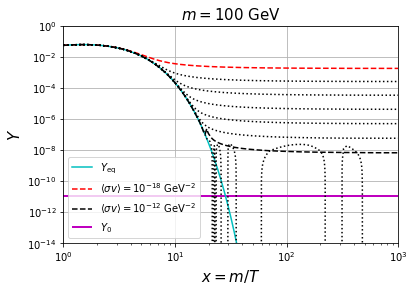

In [166]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'c',label=r'$Y_{\rm eq}$')



k=fk(sigmav=1E-18)  #start to buid a piece
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')

k=fk(sigmav=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


#*****************
k=fk(sigmav=1E-10)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN E-11????????                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')  #THAT'S THE LAST BLACK LINE




plt.hlines(1E-11,1,1000,linestyles='-',color='m',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                    #WHAT DOES IT REFER TO?
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE 


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease!!

#STILL MISSING THE FACTOR RELATED TO THE RELATIVISTIC DEGREE OF FREEDOM

In [28]:
# I was wondering if we had to consider also the radiation era when the co-omiving number density
# is constant to get a much complete description, but probably it's irrelevant,
# due to the fact that we are interested to the freeze-out part, and the previous
# one is kind of "boring" because is constant.

## Under here is without the use of the function gs_to_half

In [167]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
#So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
#the starting point, and the third is the variable you want to integrate into.
#************

In [168]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)  #built followig the formula of the Y effecace/affective

In [169]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  #starting to build the dY/dx

def BEx(x,m=100):
    #T=m/x
    return k/x**2   #missing piece of the formula that's still missing.

In [170]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx (7.10 formula of DM production mechanism)

/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


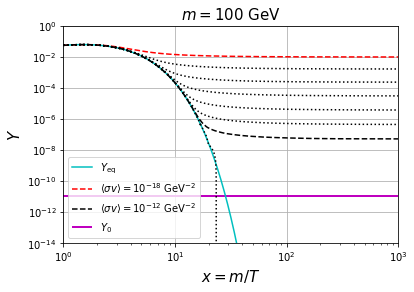

In [171]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'c',label=r'$Y_{\rm eq}$')



k=fk(sigmav=1E-18)  #start to buid a piece
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'r--',label=r'$\langle \sigma v \rangle = 10^{-18}\ {\rm GeV}^{-2}$')

k=fk(sigmav=1E-17)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-16)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-14)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-13)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


#*****************
k=fk(sigmav=1E-10)                #WHAT HAPPENS WHEN THE AVERAGE CROSS SECTION TIMES VELOCITY GOES DOWN E-11????????                                                        
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BE,Yeq(x[0]),x)
plt.loglog(x,Y,'k--',label=r'$\langle \sigma v \rangle = 10^{-12}\ {\rm GeV}^{-2}$')  #THAT'S THE LAST BLACK LINE




plt.hlines(1E-11,1,1000,linestyles='-',color='m',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                    #WHAT DOES IT REFER TO?
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE 


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease!!

#STILL MISSING THE FACTOR RELATED TO THE RELATIVISTIC DEGREE OF FREEDOM